In [1]:
# Jovan Jodhitya
# 15/383237/PA/16897

# import libraries================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random


# import data======================================================================
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

data = pd.read_csv(url, header = None, names = ["X1", "X2", "X3", "X4", "Class"])
data["Setosa"] = np.where(data["Class"]=="Iris-setosa",1,0)
data["Versicolor"] = np.where(data["Class"]=='Iris-versicolor',1,0)
data["Virginica"] = np.where(data["Class"]=='Iris-virginica',1,0)
print("Dataset:")
print(data.head(150))


Dataset:
      X1   X2   X3   X4           Class  Setosa  Versicolor  Virginica
0    5.1  3.5  1.4  0.2     Iris-setosa       1           0          0
1    4.9  3.0  1.4  0.2     Iris-setosa       1           0          0
2    4.7  3.2  1.3  0.2     Iris-setosa       1           0          0
3    4.6  3.1  1.5  0.2     Iris-setosa       1           0          0
4    5.0  3.6  1.4  0.2     Iris-setosa       1           0          0
5    5.4  3.9  1.7  0.4     Iris-setosa       1           0          0
6    4.6  3.4  1.4  0.3     Iris-setosa       1           0          0
7    5.0  3.4  1.5  0.2     Iris-setosa       1           0          0
8    4.4  2.9  1.4  0.2     Iris-setosa       1           0          0
9    4.9  3.1  1.5  0.1     Iris-setosa       1           0          0
10   5.4  3.7  1.5  0.2     Iris-setosa       1           0          0
11   4.8  3.4  1.6  0.2     Iris-setosa       1           0          0
12   4.8  3.0  1.4  0.1     Iris-setosa       1           0         

In [2]:
# Inisialisasi weight dan bias===============================
dataArray = data.values.tolist()
learningRate=0.1

# Teta adalah weight dari input-layer ke hidden-layer
# Y merupakan node pada hidden layer
tetaY1 = [0.1,0.2,0.3,0.4]
biasY1 = 0.16

tetaY2 = [0.11,0.21,0.31,0.41]
biasY2 = 0.26

tetaY3 = [0.12,0.22,0.32,0.42]
biasY3 = 0.36

tetaY = [tetaY1, tetaY2, tetaY3]
biasY = [biasY1, biasY2, biasY3]

# Omega adalah weight dari hidden-layer ke output-layer
# Z merupakan node pada output layer
omegaZ1 = [0.13,0.23,0.33]
biasZ1 = 0.17

omegaZ2 = [0.14,0.24,0.34]
biasZ2 = 0.27

omegaZ3 = [0.15,0.25,0.35]
biasZ3 = 0.37

omegaZ = [omegaZ1, omegaZ2, omegaZ3]
biasZ = [biasZ1, biasZ2, biasZ3]


In [3]:
# Defining Functions============================================

# Fungsi h
def fungsiH(X, weight, bias):
    h = []
    for j in range(0, len(weight)):
        nilaiH = 0
        for i in range(0, len(weight[j])):
            nilaiH = nilaiH + (X[i]*weight[j][i])
        nilaiH = nilaiH + bias[j]
        h.append(nilaiH)
    return h

def fungsiSigmoidH(h):
    sigmoidH = []
    for i in range(0, len(h)):
        nilaiSigmoid = 1/(1 + math.e**-h[i])
        sigmoidH.append(nilaiSigmoid)
    return sigmoidH

def fungsiSoftmaxH(h):
    softmaxH = []
    for i in range(0, len(h)):
        nilaiSoftmax = math.e**h[i] / (math.e**h[0] + math.e**h[1] + math.e**h[2])
        softmaxH.append(nilaiSoftmax)
    return softmaxH
    

def hitungPrediksi(val):
    if (val[0] > val[1]) and (val[0] > val[2]):
        return "Iris-setosa"
    elif (val[1] > val[0]) and (val[1] > val[2]):
        return "Iris-versicolor"
    elif (val[2] > val[0]) and (val[2] > val[1]):
        return "Iris-virginica"


def hitungError(dataArray, sigmoidZ):
    error = []
    for i in range(0, len(sigmoidZ)):
        nilaiError = (dataArray[i+5] - sigmoidZ[i])**2
        error.append(nilaiError)
    return error


def fungsiUlarZ(dataArray, sigmo):
    ular = []
    for i in range(0, len(sigmo)):
        nilaiUlar = 2 * (sigmo[i] - dataArray[i+5]) * (1 - sigmo[i]) * sigmo[i]
        ular.append(nilaiUlar)
    return ular

def fungsiUlarY(omegaZ, ularZ, sigmoY):
    ular = []
    for j in range(0, len(sigmoY)):
        nilaiUlar = 0
        for i in range(0, len(ularZ)):
            nilaiUlar = nilaiUlar + (omegaZ[i][j]*ularZ[i])
        nilaiUlar = nilaiUlar * (1 - sigmoY[j]) * sigmoY[j]
        ular.append(nilaiUlar)
    return ular

def updateWeight(ular, X, oldWeight):
    weight = []
    for j in range(0, len(ular)):
        weightTemp = []
        for i in range(0, len(oldWeight[j])):
            deltaWeight = X[i] * ular[j]
            nilaiWeight = oldWeight[j][i] - (learningRate * deltaWeight)
            weightTemp.append(nilaiWeight)
        weight.append(weightTemp)
    return weight


def updateBias(ular, oldBias):
    bias = []
    for i in range(0, len(oldBias)):
        nilaiBias = oldBias[i] - (learningRate * ular[i])
        bias.append(nilaiBias)
    return bias

In [4]:
# defining Backpropagation===============================================

def backpropagation(iterasi, dataArray, tetaY, biasY, omegaZ, biasZ):
    HY = fungsiH(dataArray[iterasi], tetaY, biasY)
    sigmoidY = fungsiSigmoidH(HY)
    
    HZ = fungsiH(sigmoidY, omegaZ, biasZ)
    sigmoidZ = fungsiSigmoidH(HZ)
    
    ularZ = fungsiUlarZ(dataArray[iterasi], sigmoidZ);
    ularY = fungsiUlarY(omegaZ, ularZ, sigmoidY);
    
    prediksi = hitungPrediksi(sigmoidZ)
    error = hitungError(dataArray[iterasi], sigmoidZ)
    omegaBaru = updateWeight(ularZ, sigmoidY, omegaZ)
    tetaBaru = updateWeight(ularY, dataArray[iterasi], tetaY)
    biasZBaru = updateBias(ularZ, biasZ)
    biasYBaru = updateBias(ularY, biasY)
    
    output = [prediksi, error, omegaBaru, tetaBaru, biasZBaru, biasYBaru]
    return output

def backpropagationSoftmax(iterasi, dataArray, tetaY, biasY, omegaZ, biasZ):
    HY = fungsiH(dataArray[iterasi], tetaY, biasY)
    sigmoidY = fungsiSigmoidH(HY)
    
    HZ = fungsiH(sigmoidY, omegaZ, biasZ)
    sigmoidZ = fungsiSoftmaxH(HZ)
    
    ularZ = fungsiUlarZ(dataArray[iterasi], sigmoidZ);
    ularY = fungsiUlarY(omegaZ, ularZ, sigmoidY);
    
    prediksi = hitungPrediksi(sigmoidZ)
    error = hitungError(dataArray[iterasi], sigmoidZ)
    omegaBaru = updateWeight(ularZ, sigmoidY, omegaZ)
    tetaBaru = updateWeight(ularY, dataArray[iterasi], tetaY)
    biasZBaru = updateBias(ularZ, biasZ)
    biasYBaru = updateBias(ularY, biasY)
    
    output = [prediksi, error, omegaBaru, tetaBaru, biasZBaru, biasYBaru]
    return output


In [5]:
# Defining backpropagation Machine Learning =======================
# Validation algorithm: 5fold cross validation
# epoch: 100
# Sigmoid Activation function

def machineLearningSigmoid(dataArray, tetaY, biasY, omegaZ, biasZ):
    
    errorAverageTrain = []
    errorAverageValidate = []
    
    for j in range(0, 100):
        
        dataTrain = []
        dataValidate = []
        if j%5 == 0:
            for i in range(0, len(dataArray)):
                if (0 <= i <10) or (50<= i <60) or (100<= i <110):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
                    
        elif j%5 == 1:
            for i in range(0, len(dataArray)):
                if (10 <= i <20) or (60<= i <70) or (110<= i <120):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
        
        elif j%5 == 2:
            for i in range(0, len(dataArray)):
                if (20 <= i <30) or (70<= i <80) or (120<= i <130):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
                    
        elif j%5 == 3:
            for i in range(0, len(dataArray)):
                if (30 <= i <40) or (80<= i <90) or (130<= i <140):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
        
        elif j%5 == 4:
            for i in range(0, len(dataArray)):
                if (40 <= i <50) or (90<= i <100) or (140<= i <150):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
        
        # TRAINING ========================================================================
        
        errorSetosa = []
        errorVersicolor = []
        errorVirginica = []
        errorAverage = []
        
        for i in range(0, len(dataTrain)):
            output = backpropagation(i, dataTrain, tetaY, biasY, omegaZ, biasZ)
            errorSetosa.append(output[1][0])
            errorVersicolor.append(output[1][1])
            errorVirginica.append(output[1][2])
            omegaZ = output[2]
            tetaY = output[3]
            biasZ = output[4]
            biasY = output[5]
            
            average = (errorSetosa[i] + errorVersicolor[i] + errorVirginica[i])/3
            errorAverage.append(average)
        
        errorTotal = 0
        for i in range(0, len(errorAverage)):
            errorTotal = errorTotal + errorAverage[i]
            
        errorAverageTrain.append(errorTotal / len(errorAverage))
        
        #VALIDASI==========================================================================
        
        prediksiV = []
        errorSetosaV = []
        errorVersicolorV = []
        errorVirginicaV = []
        errorAverageV = []
        
        for i in range(0, len(dataValidate)):
            outputV = backpropagation(i, dataValidate, tetaY, biasY, omegaZ, biasZ)
            errorSetosaV.append(outputV[1][0])
            errorVersicolorV.append(outputV[1][1])
            errorVirginicaV.append(outputV[1][2])
        
            averageV = (errorSetosaV[i] + errorVersicolorV[i] + errorVirginicaV[i])/3
            errorAverageV.append(averageV)
            if j == 99:
                prediksiV.append(outputV[0])
            
        
        errorTotalV = 0
        for i in range(0, len(errorAverageV)):
            errorTotalV = errorTotalV + errorAverageV[i]
        
        errorAverageValidate.append(errorTotalV / len(errorAverageV))
        
    #Akurasi===========================
    countPrediksiBenar = 0
        
    for i in range(0, len(prediksiV)):
        if prediksiV[i] == dataValidate[i][4]:
            countPrediksiBenar = countPrediksiBenar + 1
            
    accuracy = (countPrediksiBenar/len(prediksiV)) * 100
    
    print("Akurasi: {}%".format(accuracy))
    plt.plot(errorAverageTrain, label = "train")
    plt.plot(errorAverageValidate, label = "validasi")
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.title('Sigmoid Error Graph')
    plt.show()

In [6]:
# Defining backpropagation Machine Learning =======================
# Validation algorithm: 5fold cross validation
# epoch: 100
# Softmax Activation function

def machineLearningSoftmax(dataArray, tetaY, biasY, omegaZ, biasZ):
    
    errorAverageTrain = []
    errorAverageValidate = []
    
    for j in range(0, 100):
        
        dataTrain = []
        dataValidate = []
        if j%5 == 0:
            for i in range(0, len(dataArray)):
                if (0 <= i <10) or (50<= i <60) or (100<= i <110):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
                    
        elif j%5 == 1:
            for i in range(0, len(dataArray)):
                if (10 <= i <20) or (60<= i <70) or (110<= i <120):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
        
        elif j%5 == 2:
            for i in range(0, len(dataArray)):
                if (20 <= i <30) or (70<= i <80) or (120<= i <130):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
                    
        elif j%5 == 3:
            for i in range(0, len(dataArray)):
                if (30 <= i <40) or (80<= i <90) or (130<= i <140):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
        
        elif j%5 == 4:
            for i in range(0, len(dataArray)):
                if (40 <= i <50) or (90<= i <100) or (140<= i <150):
                    dataValidate.append(dataArray[i])
                else:
                    dataTrain.append(dataArray[i])
        
        # TRAINING ========================================================================
        
        errorSetosa = []
        errorVersicolor = []
        errorVirginica = []
        errorAverage = []
        
        for i in range(0, len(dataTrain)):
            output = backpropagationSoftmax(i, dataTrain, tetaY, biasY, omegaZ, biasZ)
            errorSetosa.append(output[1][0])
            errorVersicolor.append(output[1][1])
            errorVirginica.append(output[1][2])
            omegaZ = output[2]
            tetaY = output[3]
            biasZ = output[4]
            biasY = output[5]
            
            average = (errorSetosa[i] + errorVersicolor[i] + errorVirginica[i])/3
            errorAverage.append(average)
        
        errorTotal = 0
        for i in range(0, len(errorAverage)):
            errorTotal = errorTotal + errorAverage[i]
            
        errorAverageTrain.append(errorTotal / len(errorAverage))
        
        #VALIDASI==========================================================================
        
        prediksiV = []
        errorSetosaV = []
        errorVersicolorV = []
        errorVirginicaV = []
        errorAverageV = []
        
        for i in range(0, len(dataValidate)):
            outputV = backpropagationSoftmax(i, dataValidate, tetaY, biasY, omegaZ, biasZ)
            errorSetosaV.append(outputV[1][0])
            errorVersicolorV.append(outputV[1][1])
            errorVirginicaV.append(outputV[1][2])
        
            averageV = (errorSetosaV[i] + errorVersicolorV[i] + errorVirginicaV[i])/3
            errorAverageV.append(averageV)
            if j == 99:
                prediksiV.append(outputV[0])
            
        
        errorTotalV = 0
        for i in range(0, len(errorAverageV)):
            errorTotalV = errorTotalV + errorAverageV[i]
        
        errorAverageValidate.append(errorTotalV / len(errorAverageV))
        
    #Akurasi===========================
    countPrediksiBenar = 0
        
    for i in range(0, len(prediksiV)):
        if prediksiV[i] == dataValidate[i][4]:
            countPrediksiBenar = countPrediksiBenar + 1
            
    accuracy = (countPrediksiBenar/len(prediksiV)) * 100
    
    print("Akurasi: {}%".format(accuracy))
    plt.plot(errorAverageTrain, label = "train")
    plt.plot(errorAverageValidate, label = "validasi")
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.title('Softmax Error Graph')
    plt.show()

Akurasi: 96.66666666666667%


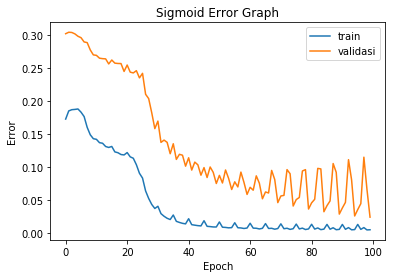

Akurasi: 93.33333333333333%


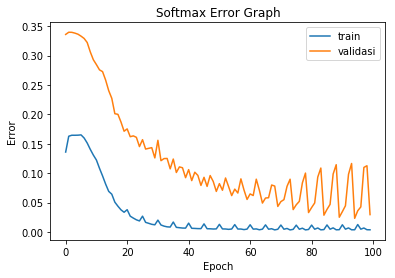

In [7]:
# Main Function================

machineLearningSigmoid(dataArray, tetaY, biasY, omegaZ, biasZ)
machineLearningSoftmax(dataArray, tetaY, biasY, omegaZ, biasZ)